In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import calculus_library as callib
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np
import math
import pandas as pd
from mlrefined_libraries import calculus_library as calclib

%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# Part 5: Higher order derivatives

We have seen how we can compute formula for the derivative of a generic function constructed out of elementary functions and operations, and that this derivative too is a generic function constructed out of elementary functions / operations. 

Because the derivative is a generic function it is natural to ask - what happens if we take *its* derivative?  

By the same logic and rules, we should be able to compute it in a similar manner, and for the same reasons it too should be a generic function with known equation.  In turn we should then be able to compute the derivative of this formula, and so on ad infinitum.  

These 'derivatives of derivatives' are referred to commonly as *higher order derivatives*, and are our current subject.

Press the botton 'Toggle code' below to toggle code on and off for entire this presentation.  

In [2]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

# 1.  Higher order derivatives 

If the derivative of a function with an equation is itself an equation, then we can take the derivative of the derivative.  

Lets start off by looking at a few examples to get a sense of how this works, and some of the new notation we will use to denote higher order derivatives.  

Afterwards we can see how to use the Automatic Differentiation calculator we discussed in the previous post to compute derivatives of any order.

## 1.1 Higher order derivatives by example

#### <span style="color:#a50e3e;">Example 1. </span> Higher order derivatives of $g(w) = w^4$

The power rule gives

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = 4\cdot w^3.
\end{equation}|

The derivate here is just another monomial - another function - and we can compute its derivative just as easily as we did $g(w)$ to begin with.  It is

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right) = 3\cdot4\cdot w^2
\end{equation}

And we can of course take the derivative of this as well using the same rules, doing so we get

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right) = 2\cdot3\cdot4\cdot w
\end{equation}

which is the *third derivative*.  One more time?  Using the same derivative rules we can compute the *fourth derivative* here which is 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right)\right) = 1\cdot2\cdot3\cdot4
\end{equation}

Below we plot the original function, along with its first three derivatives.

<IPython.core.display.Javascript object>


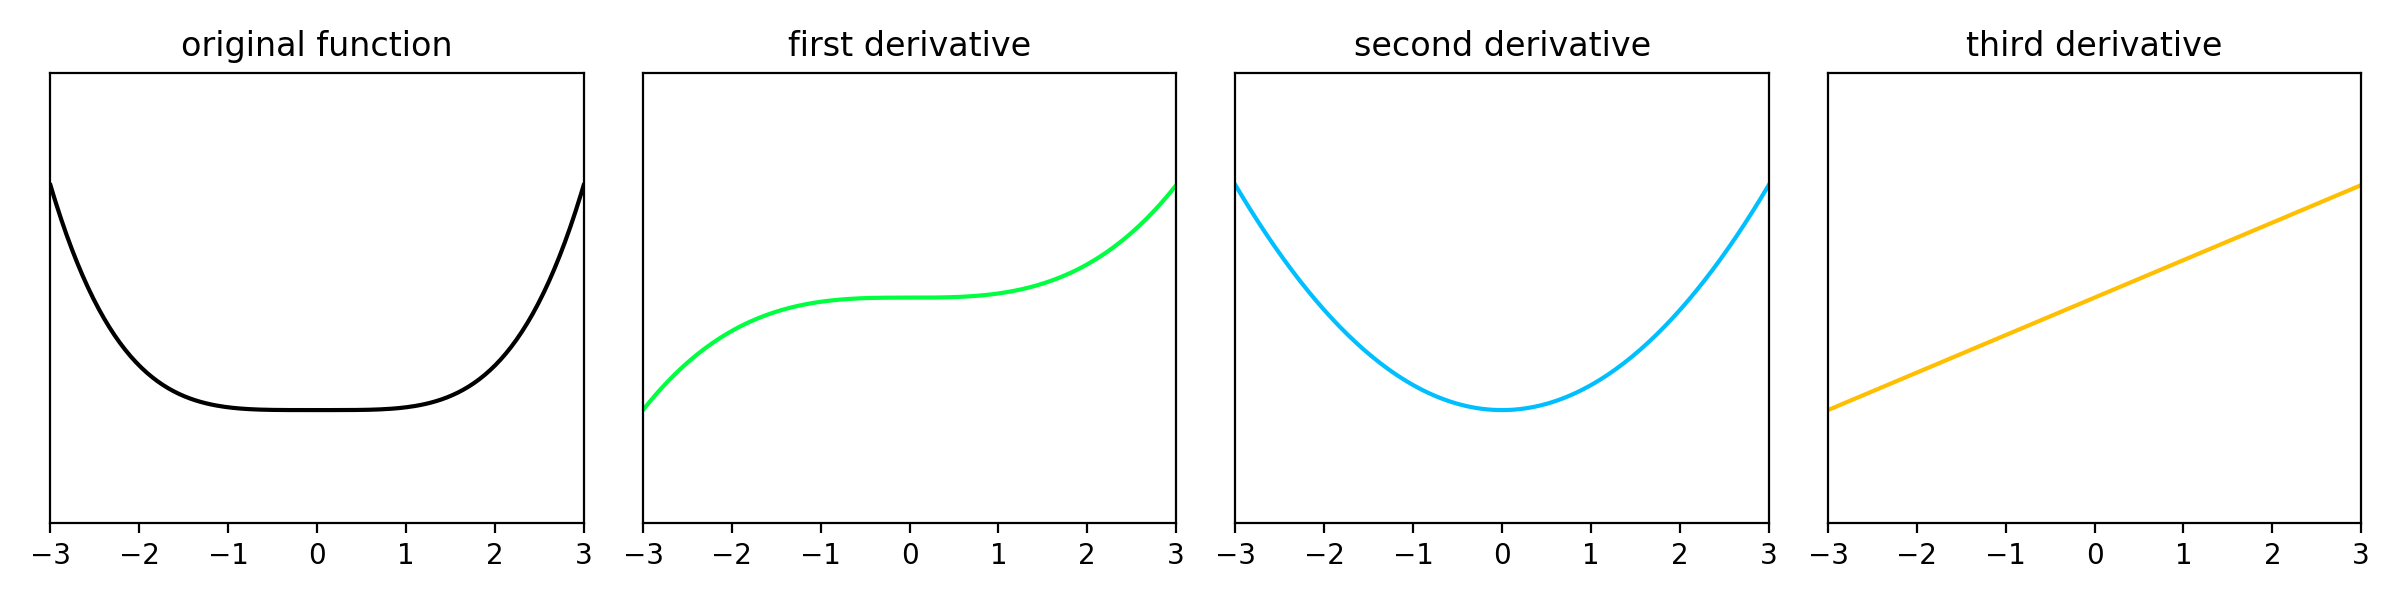

In [3]:
# what function should we play with?  Defined in the next line.
g = lambda w: w**4

# create an instance of the visualizer with this function 
der_viz = calclib.display_derivative_functions.visualizer(g = g)

# run the visualizer for our chosen input function
der_viz.draw_it()

#### <span style="color:#a50e3e;">Example 2. </span> Higher order derivatives of $g(w)=\text{cos}(3w) + w^2 + w^3$

As with the previous example we can quickly compute


\begin{array}
\
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = -3\text{sin}(3w) + 2w + 3w^2\\
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right) = -9\text{cos}(3w) + 2 + 6w\\
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)\right) = 27\text{sin}(3w) + 6\\
\end{array}


We plot these derivatives - along with the original function - below.

<IPython.core.display.Javascript object>


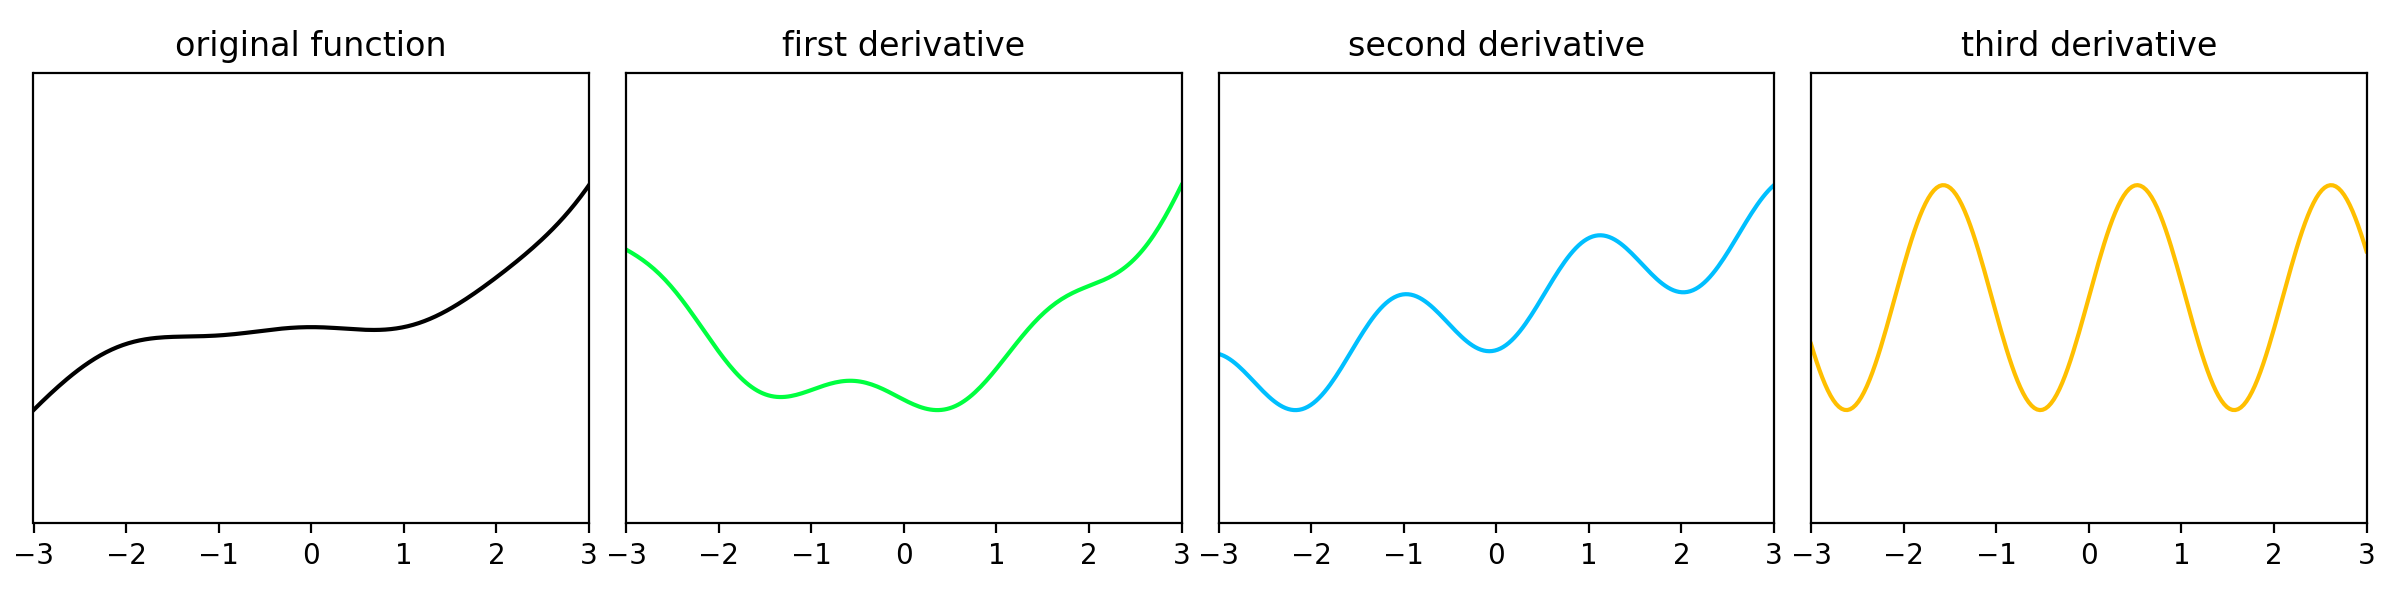

In [4]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.cos(3*w) + w**2 + w**3

# create an instance of the visualizer with this function 
der_viz = calclib.display_derivative_functions.visualizer(g = g)

# run the visualizer for our chosen input function
der_viz.draw_it()

## Higher order derivative notation

Often expressed using more compact notation than given above.  

For example, the second derivative is very often denoted more compactly as

\begin{equation}
\frac{\mathrm{d^2}}{\mathrm{d}w^2}g(w) = \frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)
\end{equation}

In general the $n^{th}$ order derivative is written as

\begin{equation}
\frac{\mathrm{d^n}}{\mathrm{d}w^n}g(w) 
\end{equation}

## 1.3 Computing higher order derivatives via the forward mode

- Higher order derivatives apply the derivative *recursively*

- e.g., the second derivative

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}\left(\frac{\mathrm{d}}{\mathrm{d}w}\left(g(w)\right)\right)
\end{equation}

- hence with AD if we input and output *explicit* computation graphs, we can apply the same code recursively in kind

- however as mentioned explicit graph / parsing requires familiarity with tools beyond our scope, so we extend the *implicit* graph construction approach discussed for first order derivatives here

- a simple adjustment to our original AD code is all that is required to generalize to any order

- see associated post for further details